In [13]:
import numpy as np
import random
from transformers import ResNetModel
from torch import nn
from torch.utils.data import Dataset
from PIL import Image
from torchvision.transforms import v2
import torch
import pandas as pd
import evaluate
from torch.utils.data import DataLoader
import torch.optim as optim
import matplotlib.pyplot as plt

In [14]:
from torchvision.models import resnet50, ResNet50_Weights

In [15]:
resnet50 = resnet50(weights=  ResNet50_Weights.DEFAULT)

In [16]:
weights = ResNet50_Weights.DEFAULT

In [17]:
preprocess= weights.transforms()

In [18]:
img_path = "globo.jpg"
img = Image.open(img_path)

In [19]:
img_transformed = preprocess(img)

In [20]:
img_transformed

tensor([[[-1.1075, -0.9705, -0.8678,  ..., -2.1179, -2.1179, -2.1179],
         [-0.8849, -0.7993, -0.7137,  ..., -2.1179, -2.1179, -2.1008],
         [-0.7137, -0.6794, -0.6452,  ..., -2.1179, -2.1179, -2.1179],
         ...,
         [-2.1008, -2.1008, -2.1008,  ..., -2.1179, -2.1008, -2.1179],
         [-2.1179, -2.1008, -2.1008,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1008, -2.1179, -2.1008,  ..., -2.1179, -2.1179, -2.1179]],

        [[ 0.3277,  0.3627,  0.3978,  ..., -0.2850, -0.2850, -0.3025],
         [ 0.3978,  0.4328,  0.4678,  ..., -0.2850, -0.2850, -0.3025],
         [ 0.4503,  0.4853,  0.5028,  ..., -0.2850, -0.2850, -0.2850],
         ...,
         [ 0.3978,  0.3978,  0.3978,  ...,  0.2052,  0.1877,  0.1702],
         [ 0.3803,  0.3978,  0.3978,  ...,  0.2052,  0.1877,  0.1702],
         [ 0.3627,  0.3803,  0.3803,  ...,  0.1877,  0.1702,  0.1702]],

        [[ 1.5420,  1.5594,  1.5594,  ...,  1.2805,  1.2631,  1.2457],
         [ 1.5768,  1.5942,  1.6291,  ...,  1

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(-0.5, 223.5, 223.5, -0.5)

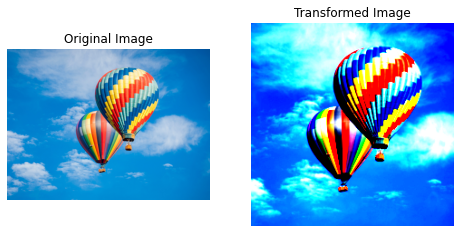

In [25]:
# Convert the PyTorch tensor to a NumPy array
img_transformed_np = img_transformed.numpy()

# Transpose the array to match the expected format for displaying images with Matplotlib
img_transformed_np = img_transformed_np.transpose((1, 2, 0))

# Display the original and transformed images using Matplotlib
plt.figure(figsize=(8, 4))

# Original Image
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(img)
plt.axis('off')

# Transformed Image
plt.subplot(1, 2, 2)
plt.title('Transformed Image')
plt.imshow(img_transformed_np)
plt.axis('off')

In [29]:
resnet50.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [34]:
batch= preprocess(img).unsqueeze(0)

In [37]:
top_k = 5
predictions = resnet50(batch).squeeze(0).softmax(0)
top_values, top_indices = predictions.topk(top_k)

for value, index in zip(top_values, top_indices):
    class_id = index.item()
    score = value.item()
    category_name = weights.meta["categories"][class_id]
    print(f"{category_name}: {100 * score:.1f}%")


balloon: 44.0%
parachute: 0.2%
water tower: 0.2%
airship: 0.2%
carousel: 0.1%


In [7]:
import torch
import torchvision.models as models
import torchvision.transforms as transforms

# Load pre-trained InceptionV3 model
inception_v3 = models.inception_v3(pretrained=True)

# Set the model to evaluation mode
inception_v3.eval()

# Example input image preprocessing
# This assumes that you have an image in PIL format
transform = transforms.Compose([
    transforms.Resize(299),
    transforms.CenterCrop(299),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])




c:\Users\Alex\anaconda3\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\Alex\anaconda3\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=Inception_V3_Weights.IMAGENET1K_V1`. You can also use `weights=Inception_V3_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [8]:
# Replace 'your_image_path' with the path to your image
image_path = 'globo.jpg'
input_image = transform(Image.open(image_path)).unsqueeze(0)

# Make a forward pass to get the features
with torch.no_grad():
    features = inception_v3(input_image)

# The 'features' variable now contains the output features of the InceptionV3 model for your input image

In [22]:
features.shape #esto son las probabilidades de que mi imagen sea cada una de las 1000 clases

torch.Size([1, 1000])

In [29]:
#quiero sacar la clase con mas probabilidad
#para eso tengo que sacar el indice de la clase con mas probabilidad
#y luego sacar la clase con ese indice

# Get the index corresponding to the maximum score and the maximum score itself.
_, index = torch.max(features, 1)
percentage = torch.nn.functional.softmax(features, dim=1)[0] * 100

print('Clase: ', index[0].item())



# Print the corresponding probability
print('Probabilidad: ', percentage[index[0]].item())


Clase:  417
Probabilidad:  99.10289001464844


In [33]:
#get the weights from inceptionv3
weights = inception_v3.fc.weight.data

Load the pretrained model, pass the transformed images to the network, extracting the feature vectors (image emmbedings), and lower the dimensions 